# Linear Algebra

Linear algebra is a branch of mathematics focusing on the study of vector spaces, vectors, and linear mappings between these spaces. It includes the analysis of lines, planes, and subspaces.

---------

# Libraries

In [25]:
# Numeric Python
import numpy as np

# Symbolic mathematics - computer algebra system (CAS)
import sympy as sy

# Linear algebra solver
from scipy.optimize import fsolve

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
from typing import Callable, Tuple, List
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import fsolve, OptimizeWarning
import warnings

---------

## Linear System of Equations

* a collection of one or more linear equations involving the same set of variables
* the goal is to find the values of the variables that satisfy all the equations simultaneously.

\begin{align*}
\left\{
\begin{array}{rcl}
x + y &=& 5 \\
x - y &=& 1
\end{array}
\right.
\end{align*}

A linear system of equations can have:
• No solution
• Many solutions
• Exactly one solution: this means multiplication by
the matrix is an invertible function

In [29]:
def solve_system(eq1: Callable[[float, float], float], 
                 eq2: Callable[[float, float], float],
                 initial_guess: Tuple[float, float] = (0, 0)) -> Tuple[float, float]:
    """
    Solves a system of two equations.

    Args:
        eq1: A callable representing the first equation of the form f(x, y) = 0.
        eq2: A callable representing the second equation of the form f(x, y) = 0.
        initial_guess: A tuple representing the initial guess for the solution.

    Returns:
        A tuple of floats representing the solution (x, y).

    Raises:
        ValueError: If the system cannot be solved with the provided initial guess.
    """
    def func_combined(variables: Tuple[float, float]) -> List[float]:
        x, y = variables
        return [eq1(x, y), eq2(x, y)]

    try:
        with warnings.catch_warnings():
            warnings.simplefilter("error", OptimizeWarning)
            solution = fsolve(func_combined, initial_guess)
            return tuple(solution)
    except OptimizeWarning:
        raise ValueError("No solution found with the provided initial guess.")

In [30]:
def plot_system(eq1: Callable[[float, float], float], 
                eq2: Callable[[float, float], float], 
                solution: Tuple[float, float],
                x_range: Tuple[float, float] = (-10, 10),
                y_range: Tuple[float, float] = (-10, 10)):
    """
    Plots a system of two equations and their solution.

    Args:
        eq1: A callable representing the first equation of the form f(x, y) = 0.
        eq2: A callable representing the second equation of the form f(x, y) = 0.
        solution: A tuple representing the solution point (x, y).
        x_range: A tuple representing the x-axis range for the plot.
        y_range: A tuple representing the y-axis range for the plot.
    """
    # Setting up the plot
    sns.set(style="darkgrid")
    fig, ax = plt.subplots(figsize=(12, 7))

    # Generating points for the lines
    x_vals = np.linspace(*x_range, 400)
    y_vals1 = np.array([fsolve(lambda y: eq1(x, y), 0)[0] for x in x_vals])
    y_vals2 = np.array([fsolve(lambda y: eq2(x, y), 0)[0] for x in x_vals])

    # Plotting the lines
    ax.plot(x_vals, y_vals1, lw=3, label='Equation 1')
    ax.plot(x_vals, y_vals2, lw=3, label='Equation 2')

    # Highlighting the solution point if it's within the plotting range
    x_sol, y_sol = solution
    if x_range[0] <= x_sol <= x_range[1] and y_range[0] <= y_sol <= y_range[1]:
        ax.scatter(x_sol, y_sol, s=200, zorder=5, color='r', alpha=.8)
        ax.plot([x_sol, x_sol], [y_range[0], y_sol], ls='--', color='b', alpha=.5)
        ax.plot([x_range[0], x_sol], [y_sol, y_sol], ls='--', color='b', alpha=.5)
        s = f'$(x,y) = ({x_sol:.2f}, {y_sol:.2f})$'
        ax.text(x_sol, y_sol + 1, s, fontsize=12)

    # Setting the plot limits and labels
    ax.set_xlim(x_range)
    ax.set_ylim(y_range)
    ax.legend()
    ax.set_title('Solution of the System', size=16)

    # Displaying the plot
    plt.show()

In [31]:
# Solving our system
def eq1(x, y): return x + y - 5
def eq2(x, y): return x - y - 1

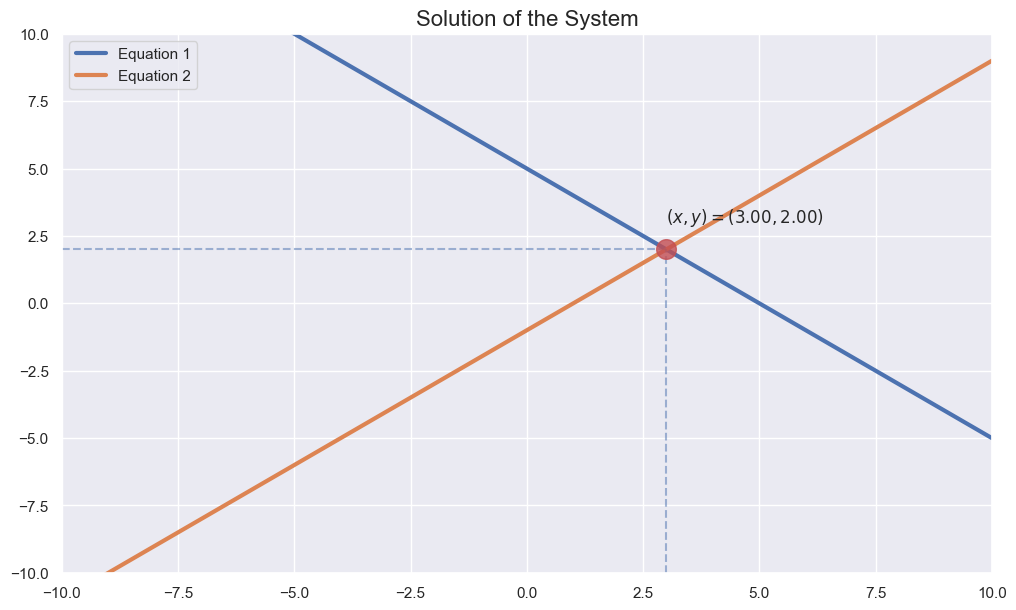

In [32]:
# Example usage
try:
    solution = solve_system(eq1, eq2)
    plot_system(eq1, eq2, solution)
except ValueError as e:
    print(e)

----

### Reduced Row Echelon Form (RREF)

* a specific form of a matrix achieved through the process of Gaussian elimination, a method for solving systems of linear equations.
* provides a clear and simplified structure, which is particularly useful for identifying solutions to a system of linear equations, understanding the rank of the matrix, and determining linear independence of the rows or columns of the matrix.

In [34]:
M = sy.Matrix([[5, 0, 11, 3], [7, 23, -3, 7], [12, 11, 3, -4]]); 
M

Matrix([
[ 5,  0, 11,  3],
[ 7, 23, -3,  7],
[12, 11,  3, -4]])

In [35]:
# This shows how the reduced row echelon form was achieved 
M_rref = M.rref(); 
M_rref # .rref() is the SymPy method for row reduced echelon form

(Matrix([
 [1, 0, 0, -2165/1679],
 [0, 1, 0,  1358/1679],
 [0, 0, 1,  1442/1679]]),
 (0, 1, 2))

In [36]:
# This is the actual reduced row echelon form 
M_rref = np.array(M_rref[0]);
M_rref

array([[1, 0, 0, -2165/1679],
       [0, 1, 0, 1358/1679],
       [0, 0, 1, 1442/1679]], dtype=object)

In [37]:
# The last column shows the solution of a system
M_rref.astype(float)

array([[ 1.        ,  0.        ,  0.        , -1.28945801],
       [ 0.        ,  1.        ,  0.        ,  0.80881477],
       [ 0.        ,  0.        ,  1.        ,  0.85884455]])

----

#### Vector
* mathematical object that has **magnitude** and **direction**
* simplest form - **one-dimensional array** - coordinates in Euclidean space:  
  for instance, threee-dimensional space would be represented by vector [x, y, z]

In [2]:
# Creating a 3D vector
vector = np.array([1, 2, 3])

# Basic operations
vector_length = np.linalg.norm(vector)
vector_scaled = 2 * vector  # Scaling the vector

print("Vector:", vector)
print("Length of the vector:", vector_length)
print("Vector scaled by 2:", vector_scaled)

Vector: [1 2 3]
Length of the vector: 3.7416573867739413
Vector scaled by 2: [2 4 6]


#### Matrix
* multidimensional array - array of vectors

In [3]:
# Creating a 2x2 matrix
matrix = np.array([[1, 2], [3, 4]])

# Matrix operations
determinant = np.linalg.det(matrix)
inverse_matrix = np.linalg.inv(matrix)

print("Matrix:\n", matrix)
print("Determinant of the matrix:", determinant)
print("Inverse of the matrix:\n", inverse_matrix)

Matrix:
 [[1 2]
 [3 4]]
Determinant of the matrix: -2.0000000000000004
Inverse of the matrix:
 [[-2.   1. ]
 [ 1.5 -0.5]]


* The determinant of a matrix is a scalar value that is computed from the elements of a square matrix. 
* Matrix Invertibility: A square matrix A is invertible (or non-singular) if and only if its determinant is not zero. If the determinant is zero, the matrix is singular and does not have an inverse.
* Solution of Linear Systems: The determinant can be used to determine whether a system of linear equations has a unique solution, no solution, or infinitely many solutions.

In [9]:
# Creating a 2x2 matrix
matrix = sy.Matrix([[1, 2], [3, 4]])

# Matrix operations
determinant = matrix.det()
inverse_matrix = matrix.inv()

print("Matrix:")
display(matrix)
print("Determinant of the matrix:", determinant)
print("Inverse of the matrix:")
display(inverse_matrix)

Matrix:


Matrix([
[1, 2],
[3, 4]])

Determinant of the matrix: -2
Inverse of the matrix:


Matrix([
[ -2,    1],
[3/2, -1/2]])

### Scalar

* single number - magnitude or quantity

#### Tensor 
* generalized concept that extends arrays into higher dimensions
* describe relationships between sets of geometric vectors, scalars, and other tensors 

* scalar - tensor of order 0
* vector - tensor of order 1
* matrix - tensor of order 2

In [4]:
# Creating a 3D tensor
tensor = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

# Tensor operation
sum_along_axis = np.sum(tensor, axis=0)

print("Tensor:\n", tensor)
print("Sum along axis 0:\n", sum_along_axis)

Tensor:
 [[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
Sum along axis 0:
 [[ 6  8]
 [10 12]]


---------

### Matrix Operations

Matrix _addition_ operations are straightforward:
1. $A+ B= B+ A$
2. $(A+B)+ C=A+(B+C)$
3. $c(A+B)=cA+cB$
4. $(c+d)A=cA+c{D}$
5. $c(dA)=(cd)A$
6. $A+{0}=A$, where ${0}$ is the zero matrix
7. For any $A$, there exists an $- A$, such that $ A+(- A)=0$.

They are as obvious as it looks, so no proofs are provided. And the matrix _multiplication_ properties are:
1. $ A({BC})=({AB}) C$
2. $c({AB})=(cA)B=A(cB)$
3. $A(B+ C)={AB}+{AC}$
4. $(B+C)A={BA}+{CA}$

Two kinds of multiplication:
* **Hadamard multiplication** - element-wise product
* **matrix multiplication** - matrix product

In [50]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

In [51]:
# Hadamard elementwise product
A*B

array([[ 5, 12],
       [21, 32]])

In [52]:
# Matrix product
A@B

array([[19, 22],
       [43, 50]])

In [54]:
# Matrix transpose
A.T

array([[1, 3],
       [2, 4]])

The properties of transpose are
1. $(A^T)^T$
2. $(A+B)^T=A^T+B^T$
3. $(cA)^T=cA^T$
4. $(AB)^T=B^TA^T$

In [56]:
# Identity Matrix
sy.eye(5)

Matrix([
[1, 0, 0, 0, 0],
[0, 1, 0, 0, 0],
[0, 0, 1, 0, 0],
[0, 0, 0, 1, 0],
[0, 0, 0, 0, 1]])

An **identity matrix** is a square matrix that has 1s on the main diagonal (from the top left to the bottom right) and 0s in all other positions.  
The identity matrix is a key element in matrix algebra and is often used in solving matrix equations and in defining the inverse of a matrix.
When multiplied by any matrix of an appropriate size, identity matrix leaves it unchanged.

$$
AI=IA = A
$$

The **inverse matrix** is a matrix, such that when it is multiplied by original matrix, it results in the identity matrix.

If ${AB}={BA}=\mathbf{I}$, $ B$ is called the inverse of matrix $  A$, denoted as $ B=  A^{-1}$.

In [58]:
A = np.round(10*np.random.randn(5,5)); A

array([[ -8., -10.,   0.,  -5.,   9.],
       [ -1.,  10.,  -2.,   9.,  -7.],
       [ -0.,   5.,  -0., -23.,   8.],
       [ -8.,  12.,   8.,   9.,  -7.],
       [ -1.,  11.,  13., -17.,   7.]])

In [59]:
Ainv = np.linalg.inv(A); 
Ainv

array([[-0.04256564,  0.03215238, -0.0616371 , -0.0943277 ,  0.06299434],
       [ 0.03866359,  0.15729864, -0.02097861, -0.06646347,  0.06510039],
       [-0.03752867, -0.10895306, -0.03895025,  0.0472633 ,  0.03107596],
       [ 0.06053143,  0.13006037, -0.09321617, -0.08589765,  0.07286938],
       [ 0.14986311,  0.27561192, -0.12988487, -0.20541606,  0.16881172]])

In [60]:
A@Ainv

array([[ 1.00000000e+00,  5.55111512e-17,  5.55111512e-17,
         2.77555756e-17,  5.55111512e-17],
       [ 3.60822483e-16,  1.00000000e+00, -2.77555756e-16,
        -4.16333634e-16,  2.77555756e-16],
       [ 2.22044605e-16,  4.44089210e-16,  1.00000000e+00,
        -2.22044605e-16,  2.22044605e-16],
       [ 1.38777878e-16,  5.55111512e-17,  5.55111512e-17,
         1.00000000e+00,  2.77555756e-16],
       [-1.38777878e-16, -5.55111512e-17,  5.55111512e-17,
         1.94289029e-16,  1.00000000e+00]])

-------

### Eigendecomposition

**Eigenvalue** and  **eigenvector** linear transformations represented by matrices. Here's a basic explanation:

**Eigenvalue**: An eigenvalue of a matrix \( A \) is a scalar \( \lambda \) such that there exists a non-zero vector \( v \) (an eigenvector) which, when multiplied by \( A \), results in a vector that is a scalar multiple of \( v \). Mathematically, this is expressed as:

   Av=λv,
   where A is a square matrix,
   λ is the eigenvalue,
   and v is the corresponding eigenvector

**Eigenvector**: An eigenvector \( \mathbf{v} \) of a matrix \( A \) is a non-zero vector that, when the matrix is applied to it, does not change its direction. Instead, it is scaled by a certain factor, which is the eigenvalue \( \lambda \). Eigenvectors are central in determining the character of the linear transformation described by the matrix.


-------

Norms
* Functions that measure how “large” a vector is
* Similar to a distance between zero and the point represented by the vector

------

Special Matrices and Vectors

* Unit vector
\hat{\mathbf{a}}
* Symmatric matrix 
A = \begin{pmatrix}
    a & b & c \\
    b & d & e \\
    c & e & f
\end{pmatrix}
* Orthogonal matrix
Q = \begin{pmatrix}
    q_{11} & q_{12} & q_{13} \\
    q_{21} & q_{22} & q_{23} \\
    q_{31} & q_{32} & q_{33}
\end{pmatrix}
